Dataset loaded successfully.

P-value: 2.583918714549327e-05
There is a significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


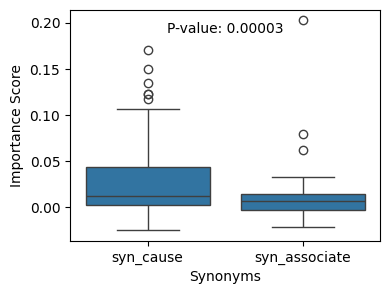

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

def analyze_datasets(file_path_cred):
    data_cred = pd.read_csv(file_path_cred, delimiter='\t')
    print("Dataset loaded successfully.")


    data_cred = data_cred[data_cred['original_prediction'] == 1]
#     print(f"Filtered data_cred shape: {data_cred.shape}")

    
    data_cred = data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob', 'word': 'words'})

    # Define the two lists
    syn_cause = ['causation', 'do', 'inducer', 'induction', 'make', 'inducement', 'stimulate', 'stimulus', 'inducive', 'get',
                 'causative', 'have', 'cause', 'induce', 'stimulation', 'inducing', 'causation', 'impact', 'developement', 'get', 'make', 'case',
                 'movement', 'induce', 'stimulus', 'causal', 'crusade', 'do', 'inducer', 'inducement',
                 'causal_agent', 'campaign', 'causative', 'grounds', 'reason', 'stimulation', 'drive', 'stimulate', 'causing', 'induction', 'causa', 'inducive', 'effort', 'suit', 'inducing', "caused", "causes"]

    syn_associate = ['companionship', 'associate','associations', 'connective', 'associatory', 'fellow', 'tie_in',
                     'connexion', 'associate_degree', 'associable', 'familiar', 'affiliate',  'companion',
                     'fellowship', 'link', 'linked', 'support', 'related', 'consort', 'colligation', 'relation', 'association',
                     'comrade', 'connect', 'associative', 'linkage', 'connection', 'link_up',
                     'correlate', 'correlative', 'correlativity', 'correlated', 'correlation']

    cause_data = data_cred[data_cred['words'].isin(syn_cause)]
    associate_data = data_cred[data_cred['words'].isin(syn_associate)]
#     print(f"Filtered cause_data shape: {cause_data.shape}, associate_data shape: {associate_data.shape}")

    
    max_imp_scores_cause = cause_data.groupby(['PMID', 'words'])['importance_score'].max().reset_index()
    max_imp_scores_associate = associate_data.groupby(['PMID', 'words'])['importance_score'].max().reset_index()

    causal_score = max_imp_scores_cause.importance_score.tolist()
    associate_score = max_imp_scores_associate.importance_score.tolist()

    filtered_values_cause = [value for value in causal_score if value > 0]
    filtered_values_associate = [value for value in associate_score if value > 0]
#     print(f"Filtered values - cause: {len(filtered_values_cause)}, associate: {len(filtered_values_associate)}")

    dif = len(filtered_values_cause) - len(filtered_values_associate)
    filtered_values_associate.extend([0] * dif)


    stat, p_value = wilcoxon(filtered_values_associate, filtered_values_cause)
    print()
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("There is a significant difference between associate_syn_imp_sc and cause_syn_imp_sc.")
    else:
        print("There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.")
        
    print()
    combined_data = pd.DataFrame({
        'Importance Score': pd.concat([max_imp_scores_cause['importance_score'], max_imp_scores_associate['importance_score']]),
        'List': ['syn_cause'] * len(max_imp_scores_cause) + ['syn_associate'] * len(max_imp_scores_associate)
    })

    print("Generating box plot...")
    plt.figure(figsize=(4, 3))
    ax=sns.boxplot(x='List', y='Importance Score', data=combined_data)
    
    y_min, y_max = ax.get_ylim()
    plt.text(0.5, y_max - 0.1 * (y_max - y_min), f'P-value: {p_value:.5f}', 
         horizontalalignment='center', size='medium', color='black')
    
#     # Add p-value text inside the plot
#     plt.text(0.5, 1.05 * max(combined_data['Importance Score']), f'P-value: {p_value:.4f}', 
#     horizontalalignment='center', size='medium', color='black', weight='semibold')

    plt.xlabel('Synonyms')
    plt.ylabel('Importance Score')
    plt.show()
# Example usage
file_path_cred = 'word_importance_score_cred_withpred_train.tsv'
analyze_datasets(file_path_cred)


Dataset loaded successfully.

P-value: 1.0
There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


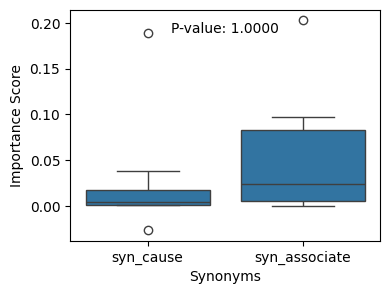

In [11]:
file_path_cdr = 'word_importance_score_cdr_withpred_train.tsv'
analyze_datasets(file_path_cdr)

Dataset loaded successfully.

P-value: 0.0015561001446164466
There is a significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


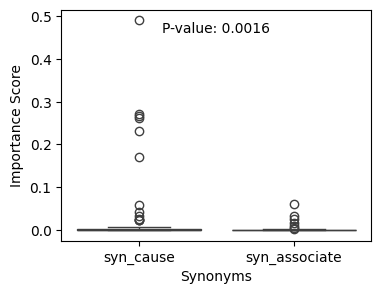

In [12]:
file_path_cred_xgb = 'word_importance_score_cred_withpred_traindata_xgb.tsv'
analyze_datasets(file_path_cred_xgb)

Dataset loaded successfully.

P-value: 0.84375
There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


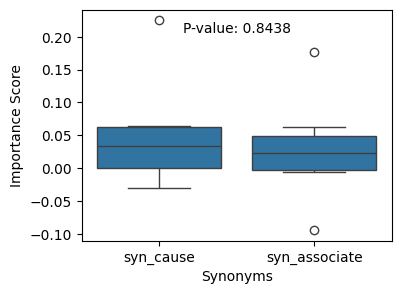

In [13]:
file_path_cdr_xgb = 'word_importance_score_cdr_withpred_traindata_xgb.tsv'
analyze_datasets(file_path_cdr_xgb)

# Top 25 Words

Index(['PMID', 'geneid', 'diseaseid', 'words', 'imp_score', 'org_prob',
       'preturbed_prob'],
      dtype='object')
Index(['PMID', 'geneid', 'diseaseid', 'words', 'imp_score', 'org_prob',
       'preturbed_prob'],
      dtype='object')


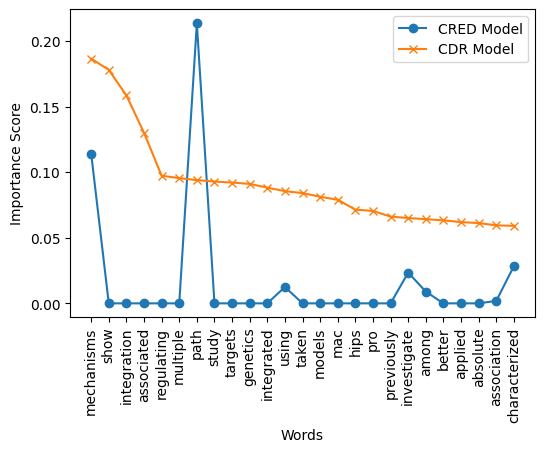

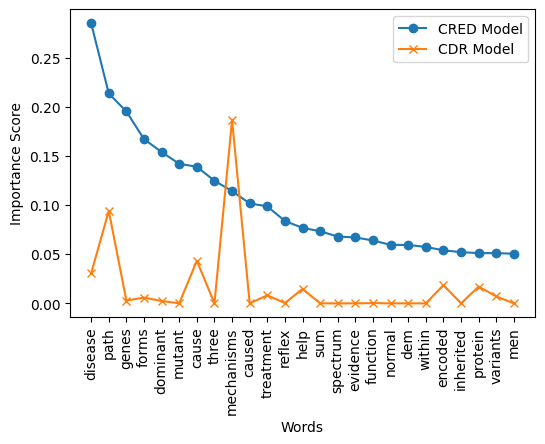

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_sort_data(file_path_cred, file_path_cdr):
    data_cred = pd.read_csv(file_path_cred,delimiter='\t')
    data_cdr = pd.read_csv(file_path_cdr)
    print(data_cred.columns)
    print(data_cdr.columns)
    sorted_data_cred = data_cred.sort_values(by='imp_score', ascending=False)
    sorted_data_cdr = data_cdr.sort_values(by='imp_score', ascending=False)
    
    sorted_data_cred = sorted_data_cred.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'words'], keep="first")
    sorted_data_cdr = sorted_data_cdr.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'words'], keep="first")
    
    sorted_data_cred = sorted_data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    data_cred = data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    
    return sorted_data_cred, sorted_data_cdr

def merge_and_clean_data(sorted_data_cred, sorted_data_cdr):
    merged_data = pd.merge(sorted_data_cred, sorted_data_cdr, on=['PMID', 'geneid', 'diseaseid', 'words'], suffixes=('_CRED', '_CDR'))
    merged_data_cleaned = merged_data.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'words'], keep="first")
    return merged_data_cleaned

def aggregate_data(merged_data_cleaned):
    aggregated_df = merged_data_cleaned.groupby(['words']).max().reset_index()
    return aggregated_df

def get_top_words(aggregated_df, column, top_n=25):
    top_words = aggregated_df.sort_values(by=column, ascending=False).head(top_n)
    return top_words

def plot_data(data):
    # Selecting only the necessary columns for the plot
    plot_data = data[['words', 'imp_score_CRED', 'imp_score_CDR']]

    # Plotting
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.plot(plot_data['words'], plot_data['imp_score_CRED'], label='CRED Model', marker='o')
    plt.plot(plot_data['words'], plot_data['imp_score_CDR'], label='CDR Model', marker='x')
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Importance Score')
    #plt.title('Top 25 Words from CRED Model and their Importance in CDR Model')
    plt.legend()
    #plt.tight_layout()
    plt.show()

# File paths for svm
file_path_cred = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_svm.tsv'
file_path_cdr = '/home/ubuntu/bert_gt/word_imp_sc_test_data_CDR_trained.csv'

# Load and sort data
sorted_data_cred, sorted_data_cdr = load_and_sort_data(file_path_cred, file_path_cdr)

# Merge and clean data
merged_data_cleaned = merge_and_clean_data(sorted_data_cred, sorted_data_cdr)

# Aggregate data
aggregated_df = aggregate_data(merged_data_cleaned)

# Get top 25 words
top_25_words_cdr = get_top_words(aggregated_df, 'imp_score_CDR')
top_25_words_cred = get_top_words(aggregated_df, 'imp_score_CRED')
plot_data(top_25_words_cdr)
plot_data(top_25_words_cred)

# Plot top words one by one



## File paths for xgboost

Index(['PMID', 'geneid', 'diseaseid', 'words', 'imp_score', 'org_prob',
       'preturbed_prob'],
      dtype='object')
Index(['PMID', 'geneid', 'diseaseid', 'word', 'importance_score',
       'org_prob_score', 'perturbed_prob_score', 'original_prediction'],
      dtype='object')


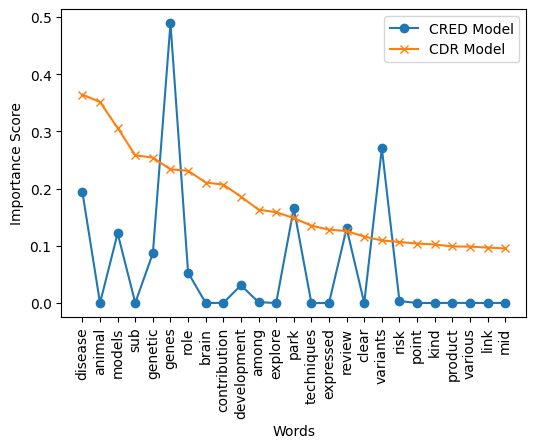

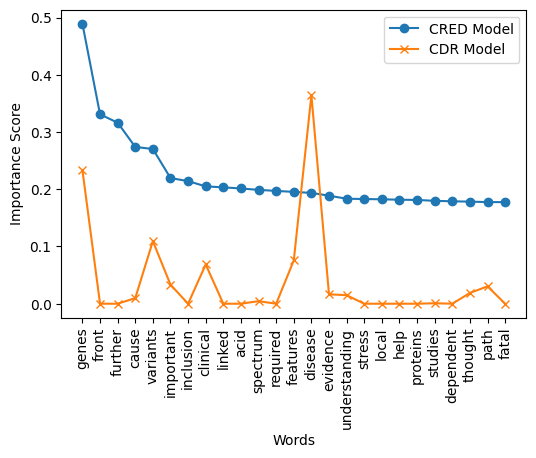

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_sort_data(file_path_cred, file_path_cdr):
    data_cred = pd.read_csv(file_path_cred,delimiter='\t')
    data_cdr = pd.read_csv(file_path_cdr,delimiter='\t')
    print(data_cred.columns)
    print(data_cdr.columns)
    sorted_data_cred = data_cred.sort_values(by='imp_score', ascending=False)
    sorted_data_cdr = data_cdr.sort_values(by='importance_score', ascending=False)
    
    sorted_data_cred = sorted_data_cred.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'words'], keep="first")
    sorted_data_cdr = sorted_data_cdr.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    
    sorted_data_cred = sorted_data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    data_cred = data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    
    sorted_data_cdr = sorted_data_cdr.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'importance_score':'imp_score', 'org_prob_score': 'org_prob'})
    data_cdr = data_cdr.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    

    return sorted_data_cred, sorted_data_cdr

def merge_and_clean_data(sorted_data_cred, sorted_data_cdr):
    merged_data = pd.merge(sorted_data_cred, sorted_data_cdr, on=['PMID', 'geneid', 'diseaseid', 'words'], suffixes=('_CRED', '_CDR'))
    merged_data_cleaned = merged_data.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'words'], keep="first")
    return merged_data_cleaned

def aggregate_data(merged_data_cleaned):
    aggregated_df = merged_data_cleaned.groupby(['words']).max().reset_index()
    return aggregated_df

def get_top_words(aggregated_df, column, top_n=25):
    top_words = aggregated_df.sort_values(by=column, ascending=False).head(top_n)
    return top_words

def plot_data(data):
    # Selecting only the necessary columns for the plot
    plot_data = data[['words', 'imp_score_CRED', 'imp_score_CDR']]

    # Plotting
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.plot(plot_data['words'], plot_data['imp_score_CRED'], label='CRED Model', marker='o')
    plt.plot(plot_data['words'], plot_data['imp_score_CDR'], label='CDR Model', marker='x')
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Importance Score')
    #plt.title('Top 25 Words from CRED Model and their Importance in CDR Model')
    plt.legend()
    #plt.tight_layout()
    plt.show()

# File paths for xgboost
file_path_cred = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_xgb.tsv'
# file_path_cdr = '/home/ubuntu/bert_gt/word_imp_sc_test_data_CDR_trained_new.csv'
file_path_cdr = 'word_importance_score_cdr_withpred_testdata_xgb.tsv'

# Load and sort data
sorted_data_cred, sorted_data_cdr = load_and_sort_data(file_path_cred, file_path_cdr)

# Merge and clean data
merged_data_cleaned = merge_and_clean_data(sorted_data_cred, sorted_data_cdr)

# Aggregate data
aggregated_df = aggregate_data(merged_data_cleaned)

# Get top 25 words
top_25_words_cdr = get_top_words(aggregated_df, 'imp_score_CDR')
top_25_words_cred = get_top_words(aggregated_df, 'imp_score_CRED')
plot_data(top_25_words_cdr)
plot_data(top_25_words_cred)
# Plot top words one by one

## Word cloud

In [32]:

import pandas as pd

# Load the datasets
file_path_cred_samp = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_sample_abstract_svm.tsv'
# file_path_cdr_samp = 'word_importance_score_CDR_trained_samp_abs.tsv'
file_path_cdr_samp = '/home/ubuntu/CRED_application/word_imp_sc_CDR_trained_sample_abstract_svm.tsv'

data_cred_samp = pd.read_csv(file_path_cred_samp, delimiter='\t')
data_cdr_samp = pd.read_csv(file_path_cdr_samp, delimiter='\t')

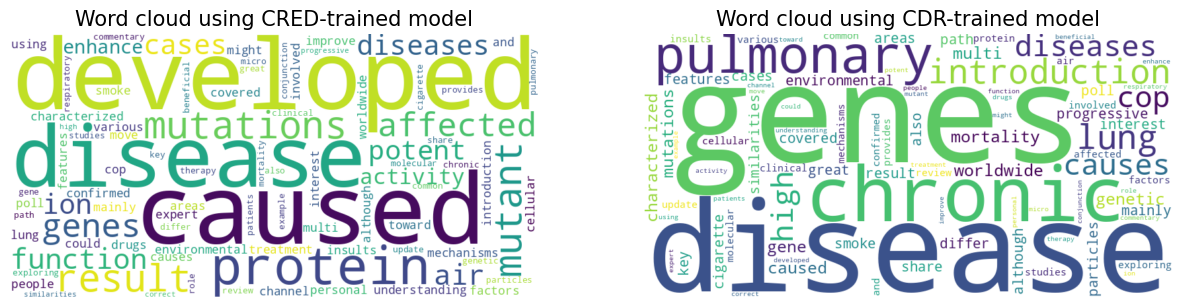

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


# Identifying the top 20 words in each dataset
cred_dict = data_cred_samp.set_index('words')['imp_score'].to_dict()
cdr_dict = data_cdr_samp.set_index('words')['imp_score'].to_dict()

abs_scores_cred = {word: abs(score)+0.5 for word, score in cred_dict.items()}
abs_scores_cdr = {word: abs(score)+0.5 for word, score in cdr_dict.items()}


# Generating word clouds with inverted scores
wordcloud_cred_inverted = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(abs_scores_cred)
wordcloud_cdr_inverted = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(abs_scores_cdr)

# Plotting the word clouds
plt.figure(figsize=(15, 7))

# Word cloud for CRED with inverted scores
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cred_inverted, interpolation='bilinear')
plt.title('Word cloud using CRED-trained model', fontsize=15)
plt.axis('off')

# Word cloud for CDR with inverted scores
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cdr_inverted, interpolation='bilinear')
plt.title('Word cloud using CDR-trained model', fontsize=15)
plt.axis('off')

plt.show()

